# MAT 381E Homework 3

## Question 1

1. Using the library [Beautiful Soup](https://pypi.org/project/beautifulsoup4/) write a function that takes a URL from a specific Turkish Newspaper (any newspaper you'd like) and extracts and then returns the text (not the HTML source) of the news article given in the URL. (Warning: you cannot write a universal function that works for every newspaper. The function has to be specific to a specific newspaper.)

2. Write a separate function that cleans the text and removes all Turkish stopwords for a text coming from Step 1.

3. Display word clouds of 5 news articles after you apply the functions in Step 1 and Step 2.

In [3]:
import numpy as np
import pandas as pd
import regex as re
import requests
import nltk

import matplotlib.pyplot as plt

from collections import Counter
from xmltodict import parse
from bs4 import BeautifulSoup
from snowballstemmer import TurkishStemmer
from  nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [4]:
def Haber(link):

  with requests.get(link) as url:
      raw = BeautifulSoup(url.content,'html.parser')
  link = raw.find('div',{'class':"timeline__links"}).find_all("div",{"class":"timeline__link"})
  return link

Haber("https://www.milliyet.com.tr/son-dakika-haberleri/")


[<div class="timeline__link"><time class="timeline__date">20:17</time><a href="/siyaset/iyi-parti-milletvekili-orsten-hastane-cikisi-aciklama-6870110" target="_blank"><div class="timeline__img__wrapper"><span class="timeline__img__bg" style="background-image:url('https://i2.milimaj.com/i/milliyet/75/0x60/63936d7286b24a240cccc561.jpg')"></span><img alt="İyi Parti Milletvekili Örs'ten hastane çıkışı açıklama" class="timeline__img" src="https://i2.milimaj.com/i/milliyet/75/0x60/63936d7286b24a240cccc561.jpg"/></div><strong class="timeline__text">İyi Parti Milletvekili Örs'ten hastane çıkışı açıklama</strong></a></div>,
 <div class="timeline__link"><time class="timeline__date">20:10</time><a href="/dunya/kosova-cumhurbaskanindan-sirbistan-yonetimine-sert-tepki-6870105" target="_blank"><div class="timeline__img__wrapper"><span class="timeline__img__bg" style="background-image:url('https://i2.milimaj.com/i/milliyet/75/0x60/63936c0a86b24a240cccc553.jpg')"></span><img alt="Kosova Cumhurbaşkanı'

In [5]:
text=[]
for i in Haber("https://www.milliyet.com.tr/son-dakika-haberleri/"):
    
    text.append(i.find("a").find("strong",{"class":"timeline__text"}).text)
    print(text)

["İyi Parti Milletvekili Örs'ten hastane çıkışı açıklama"]
["İyi Parti Milletvekili Örs'ten hastane çıkışı açıklama", "Kosova Cumhurbaşkanı'ndan Sırbistan yönetimine sert tepki"]
["İyi Parti Milletvekili Örs'ten hastane çıkışı açıklama", "Kosova Cumhurbaşkanı'ndan Sırbistan yönetimine sert tepki", 'Yunan unsurları tarafından ölüme terk edilen kaçak göçmenler kurtarıldı']
["İyi Parti Milletvekili Örs'ten hastane çıkışı açıklama", "Kosova Cumhurbaşkanı'ndan Sırbistan yönetimine sert tepki", 'Yunan unsurları tarafından ölüme terk edilen kaçak göçmenler kurtarıldı', "Bakan Karaismailoğlu'ndan TBMM'de önemli açıklamalar"]
["İyi Parti Milletvekili Örs'ten hastane çıkışı açıklama", "Kosova Cumhurbaşkanı'ndan Sırbistan yönetimine sert tepki", 'Yunan unsurları tarafından ölüme terk edilen kaçak göçmenler kurtarıldı', "Bakan Karaismailoğlu'ndan TBMM'de önemli açıklamalar", 'TRT Genel Müdürü Sobacı: Türkiye, Dünya için şahsiyetli bir mücadele veriyor']
["İyi Parti Milletvekili Örs'ten hastane çık

In [6]:
def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele
 
    # return string
    return str1

In [7]:
data = re.sub(r'[^\w\s]','',listToString(text)).split()
data

['İyi',
 'Parti',
 'Milletvekili',
 'Örsten',
 'hastane',
 'çıkışı',
 'açıklamaKosova',
 'Cumhurbaşkanından',
 'Sırbistan',
 'yönetimine',
 'sert',
 'tepkiYunan',
 'unsurları',
 'tarafından',
 'ölüme',
 'terk',
 'edilen',
 'kaçak',
 'göçmenler',
 'kurtarıldıBakan',
 'Karaismailoğlundan',
 'TBMMde',
 'önemli',
 'açıklamalarTRT',
 'Genel',
 'Müdürü',
 'Sobacı',
 'Türkiye',
 'Dünya',
 'için',
 'şahsiyetli',
 'bir',
 'mücadele',
 'veriyorZonguldak',
 'açıklarında',
 'kadın',
 'cesedi',
 'bulunduYenilik',
 'Partisi',
 'Lideri',
 'Yılmazı',
 'bıçakla',
 'yaralayan',
 'şüpheli',
 'tutuklandıCumhurbaşkanı',
 'Erdoğan',
 'Gazprom',
 'Başkanı',
 'Millerı',
 'kabul',
 'ettiMeteoroloji',
 'uyardı',
 'Cumartesi',
 'gününden',
 'itibaren',
 'etkisini',
 'gösterecekBolsonaroya',
 'seçim',
 'kampanyasında',
 'yolsuzluk',
 'davası']

In [8]:
def stopWord(text):

  stemmer = TurkishStemmer()
  cleaned = stemmer.stemWords(text)
  res = Counter(cleaned)
  dict(sorted(res.items(), key=lambda x: x[1], reverse=True))
  return cleaned

stopWord(text[0:5])

["İyi Parti Milletvekili Örs'ten hastane çıkışı açıkla",
 "Kosova Cumhurbaşkanı'ndan Sırbistan yönetimine sert tepki",
 'Yunan unsurları tarafından ölüme terk edilen kaçak göçmenler kurtarıl',
 "Bakan Karaismailoğlu'ndan TBMM'de önemli açıklama",
 'TRT Genel Müdürü Sobacı: Türkiye, Dünya için şahsiyetli bir mücadele veriyor']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


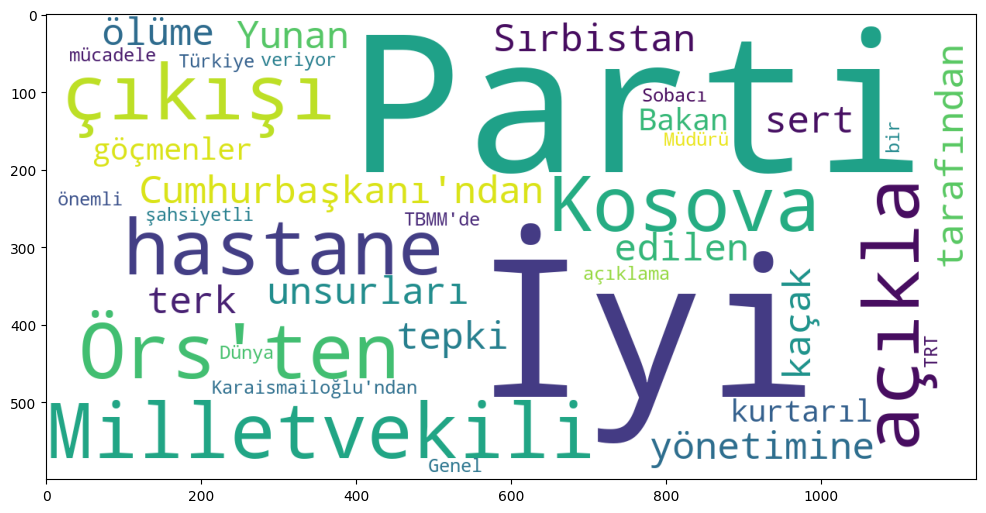

In [9]:
import nltk
nltk.download('stopwords')
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
plt.imshow(cloud.generate(' '.join(stopWord(text[0:5])

)))

## Question 2

1. Using the library [tweepy](https://docs.tweepy.org/en/stable/index.html) pull 5000 tweets (in English) on any topic you'd like.

2. Clean the text and remove all stopwords. Then sketch a word cloud of your collection.

2. Using the library [NLTK](https://www.nltk.org/) apply sentiment analysis on the tweets you collected. 

3. Analyze your results.

## Question 3

For this question use [UFO Sightings Dataset](https://www.kaggle.com/code/hakeemtfrank/ufo-sightings-data-exploration/data) from Kaggle.

1. Ingest the dataset as a pandas dataframe, and clean it if necessary.

2. Plot a geographic heatmap of UFO sightings and find hotspots.

3. Is there a statistically verifiable correlation between shape of the UFO and the duration of the sighting. Investigate.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import geopandas
import seaborn as sbn
data=pd.read_csv("./kaggle/complete.csv", error_bad_lines=False)
data=data.drop([48461])

C:\Users\Bora\AppData\Local\Temp\ipykernel_4452\3068128239.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("./kaggle/complete.csv", error_bad_lines=False)
Skipping line 878: expected 11 fields, saw 12
Skipping line 1713: expected 11 fields, saw 12
Skipping line 1815: expected 11 fields, saw 12
Skipping line 2858: expected 11 fields, saw 12
Skipping line 3734: expected 11 fields, saw 12
Skipping line 4756: expected 11 fields, saw 12
Skipping line 5389: expected 11 fields, saw 12
Skipping line 5423: expected 11 fields, saw 12
Skipping line 5614: expected 11 fields, saw 12
Skipping line 5849: expected 11 fields, saw 12
Skipping line 6093: expected 11 fields, saw 12
Skipping line 7516: expected 11 fields, saw 12
Skipping line 7626: expected 11 fields, saw 12
Skipping line 8893: expected 11 fields, saw 12
Skipping line 9015: expected 11 fields, saw 12
Skipping line 9571: expec

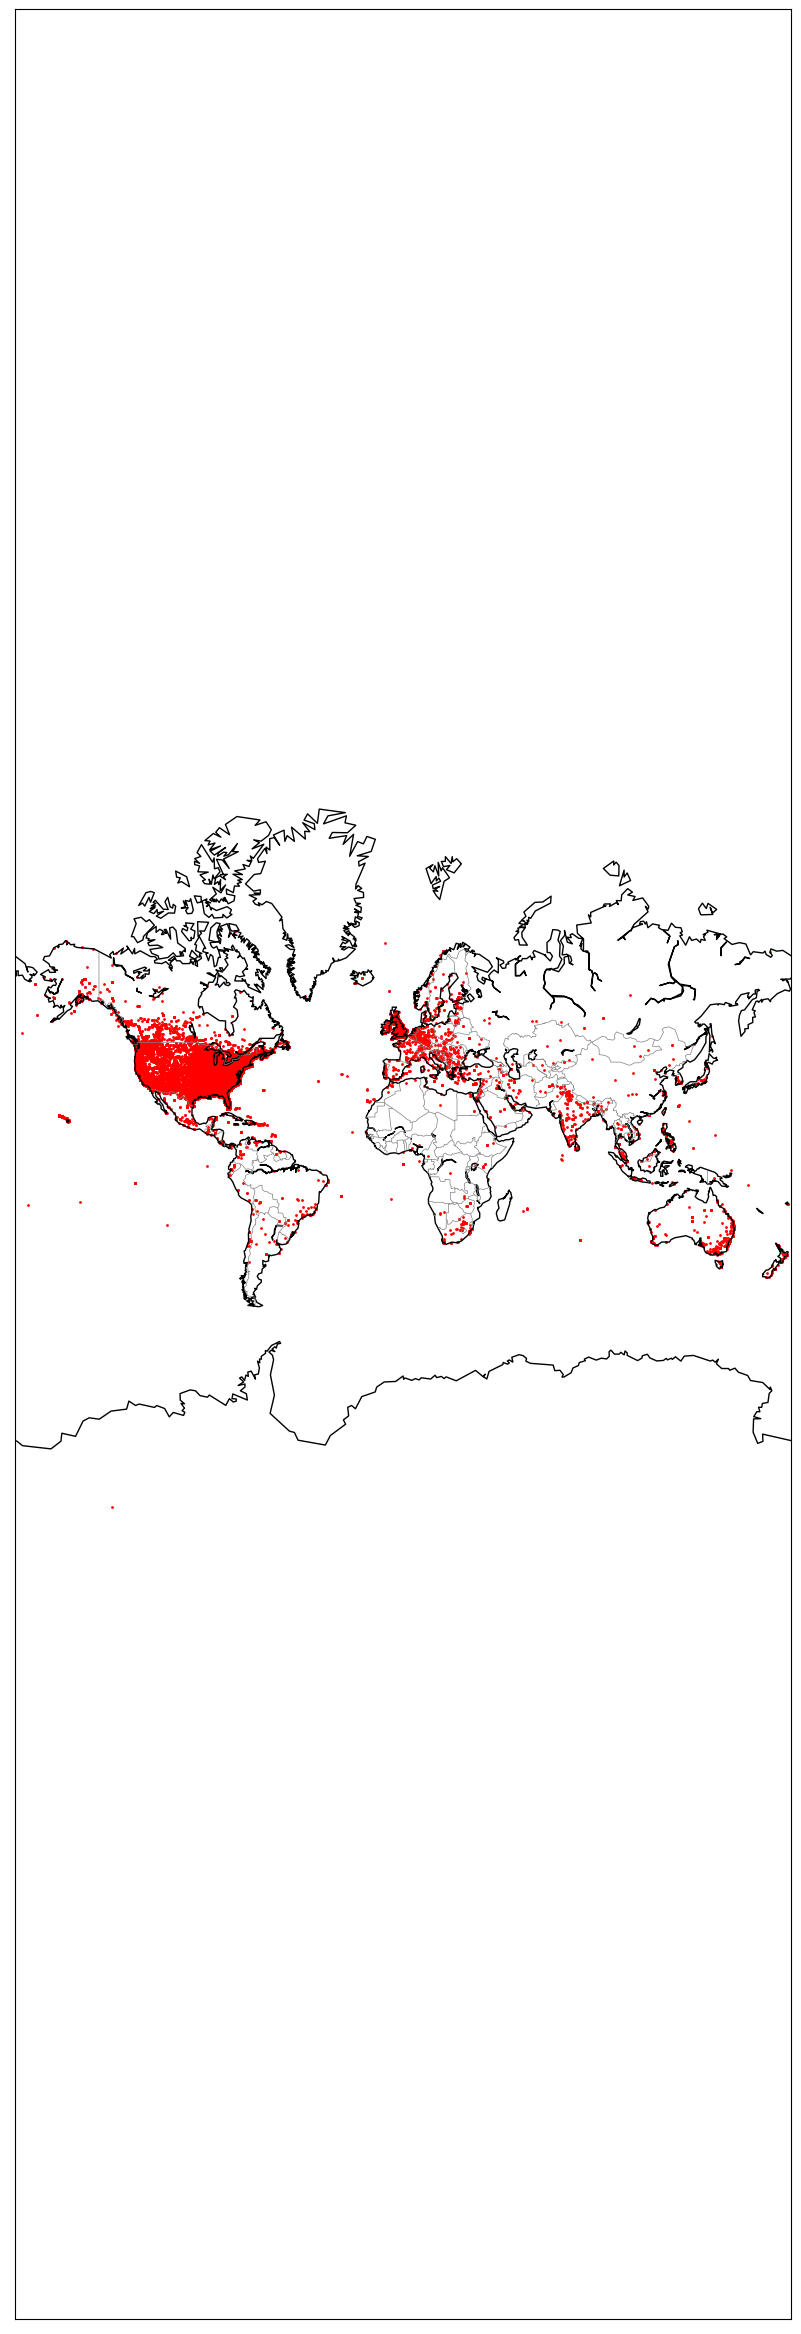

In [12]:
plt.figure(figsize=(30,30))
m=Basemap(projection='merc'
           )
m.drawcoastlines()
m.drawcountries(color='gray')


xs,ys = m(data['longitude'], data['latitude'])
m.scatter(xs, ys,s=1,color='red')


In [13]:
data=data.drop([64974,30821,39519])
data=data.drop([64975])


In [14]:
data['duration (seconds)']=data['duration (seconds)'].astype(float)
data["latitude"]=data["latitude"].astype(float)

In [15]:
import plotly.express as px
fig = px.density_mapbox(data, 
                        lat='latitude', lon='longitude', z='duration (seconds)',
                        width=1200,height=400,
                        zoom=6,
                        mapbox_style="stamen-terrain")
fig

## Question 4

For this question use [Turkish Institute of Statistics (TÜİK)](https://data.tuik.gov.tr/) data portal, and [The Humanitarian Data Exchange (HDX)](https://www.eea.europa.eu/data-and-maps/data/) data portal.

1. Get the population data for cities in Turkey as a pandas data frame from TUIK. Notice that TUIK generates the data only for human consumption. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done using python only. You are NOT allowed to clean it externally.

2. Get the crime statistics (Suçun İşlendiği İl ve Suç Türüne Göre Ceza İnfaz Kurumundan Çıkan Hükümlüler) as a pandas data frame from TUIK. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done python only. You are NOT allowed to clean it externally.

3. Get the shape files for the Turkish city municipality borders from HDX, ingest it as a geoPandas datafroma, and then clean it if necessary. Cleaning must be done using python only. You are NOT allowed to clean it externally.

4. Merge the population data, crime data, and the shapefile data into a single geoPandas dataframe.

5. Plot the population data as a choropleth map as I did in the class.

6. Plot the crime data for different categories. However, don't use the raw numbers. Use the normalized data with respect to the population of the city.